In [1]:
import pandas as pd
# Read the entire file into a DataFrame
df = pd.read_csv("vdjdb.txt", delimiter='\t')  # Assuming the file is tab-delimited, adjust if needed
# Display the DataFrame
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [2]:
def remove_coloumn(df):
    df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
           'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
           'antigen.species','vdjdb.score', 'meta']]
    return df

In [3]:
df['species'].unique()

array(['HomoSapiens', 'MusMusculus', 'MacacaMulatta'], dtype=object)

In [4]:
pd.set_option('display.max_colwidth', None)
df[['meta']].head(3)

,meta
0,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:01;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*08:03:2,HLA-DRB*15:01:1"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""065"", ""tissue"": ""PBMC""}"


In [5]:
pd.reset_option('display.max_colwidth')

filtered_df = df[df['complex.id'] == 4]
filtered_df.head(5)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...",2,sort,sanger,no,no
8,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2,sort,sanger,no,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   complex.id        92771 non-null  int64 
 1   gene              92771 non-null  object
 2   cdr3              92771 non-null  object
 3   v.segm            92670 non-null  object
 4   j.segm            91626 non-null  object
 5   species           92771 non-null  object
 6   mhc.a             92771 non-null  object
 7   mhc.b             92771 non-null  object
 8   mhc.class         92771 non-null  object
 9   antigen.epitope   92771 non-null  object
 10  antigen.gene      92709 non-null  object
 11  antigen.species   92771 non-null  object
 12  reference.id      91260 non-null  object
 13  method            92771 non-null  object
 14  meta              92771 non-null  object
 15  cdr3fix           92771 non-null  object
 16  vdjdb.score       92771 non-null  int64 
 17  web.method  

In [7]:
df.dtypes

complex.id           int64
gene                object
cdr3                object
v.segm              object
j.segm              object
species             object
mhc.a               object
mhc.b               object
mhc.class           object
antigen.epitope     object
antigen.gene        object
antigen.species     object
reference.id        object
method              object
meta                object
cdr3fix             object
vdjdb.score          int64
web.method          object
web.method.seq      object
web.cdr3fix.nc      object
web.cdr3fix.unmp    object
dtype: object

In [8]:
df.shape

(92771, 21)

In [9]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(120, 21)

In [10]:
df.count()

complex.id          92771
gene                92771
cdr3                92771
v.segm              92670
j.segm              91626
species             92771
mhc.a               92771
mhc.b               92771
mhc.class           92771
antigen.epitope     92771
antigen.gene        92709
antigen.species     92771
reference.id        91260
method              92771
meta                92771
cdr3fix             92771
vdjdb.score         92771
web.method          92771
web.method.seq      92771
web.cdr3fix.nc      92771
web.cdr3fix.unmp    92771
dtype: int64

### Dropping duplicate columns

In [11]:
# Drop duplicate rows
df=df.drop_duplicates()
df.shape

(92651, 21)

### Dropping missing and null value

In [12]:
print(df.isnull().sum())

complex.id             0
gene                   0
cdr3                   0
v.segm               101
j.segm              1144
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1511
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64


In [13]:
df=df.dropna()
df.shape

(89952, 21)

**After dropping null value**
* Bulleted

In [14]:
print(df.isnull().sum())

complex.id          0
gene                0
cdr3                0
v.segm              0
j.segm              0
species             0
mhc.a               0
mhc.b               0
mhc.class           0
antigen.epitope     0
antigen.gene        0
antigen.species     0
reference.id        0
method              0
meta                0
cdr3fix             0
vdjdb.score         0
web.method          0
web.method.seq      0
web.cdr3fix.nc      0
web.cdr3fix.unmp    0
dtype: int64


<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>


<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

>**## Exploring the data ##**

In [15]:
# Specify the substring to search for
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
substring = 'CD8+'

# Use boolean indexing to filter rows containing the substring in 'Description'
filtered_df = df[df['meta'].str.contains(substring, case=False, na=False)]

filtered_df[filtered_df['mhc.class']=='MHCII'].head(3)



,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
5309,0,TRB,CASSKLASTAGEQYF,TRBV2*01,TRBJ2-7*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*11:01,MHCII,DRFYKTLRAEQASQEV,...,HIV-1,PMID:27760342,"{""frequency"": ""70/70"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSKLASTAGEQYF"", ""cdr3_old"": ""CASSK...",1,sort,singlecell,no,no
5310,0,TRB,CASSGGQETQYF,TRBV14*01,TRBJ2-5*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,LNKIVRMYSPTSILD,...,HIV-1,PMID:27760342,"{""frequency"": ""76/76"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSGGQETQYF"", ""cdr3_old"": ""CASSGGQE...",1,sort,singlecell,no,no
5311,0,TRB,CASSWDSNYGYTF,TRBV5-5*01,TRBJ1-2*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,DRFYKTLRAEQASQEV,...,HIV-1,PMID:27760342,"{""frequency"": ""23/23"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSWDSNYGYTF"", ""cdr3_old"": ""CASSWDS...",1,sort,singlecell,no,no


In [16]:
# remove all the data with 0 complex.id
df = df[df['complex.id'] != 0]

In [17]:
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0,sort,singlecell,no,no
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2,sort,singlecell,no,no
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGGSGGYNKLIF"", ""cdr3_old"": ""CLVGGS...",0,sort,singlecell,no,no


# Select data with vdjscore range from 1-3

In [18]:
def vdjscore(df):
    df = df[df['vdjdb.score'] != 0]
    return df

df=vdjscore(df)
df

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92686,30552,TRB,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,FPQPEQPFPWQP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSQGSGGNEQFF"", ""cdr3_old"": ""CASSQG...",2,sort,singlecell,no,no
92689,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,QLQPFPQPELPY,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAASVLYGSSNTGKLIF"", ""cdr3_old"": ""CAA...",2,sort,singlecell,no,no
92690,30554,TRB,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,QLQPFPQPELPY,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSIVGSGGYNEQFF"", ""cdr3_old"": ""CASS...",2,sort,singlecell,no,no
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,...,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no


## Dropping null values

In [75]:
def drop_null(df):
    df.dropna()
    return df

In [76]:
df=drop_null(df)

## Dropping duplicates

In [77]:
def drop_duplicates(df):
    df=df.drop_duplicates
    return df

In [78]:
df=df.drop_duplicates()
df.shape

(5623, 9)

##  TCRDist3

In [19]:
# df_dash = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")

In [20]:
# df_dash.head(3)

## Installing tcrdist3 package ##

In [21]:
# pip install tcrdist3
# installing tcrdist3

In [22]:
# from tcrdist.repertoire import TCRrep
# tr = TCRrep(cell_df = df_dash, 
#             organism = 'mouse', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv')
# tr.pw_alpha
# # tr.pw_beta
# # tr.pw_cdr3_a_aa
# # tr.pw_cdr3_b_aa

In [23]:
# tr = TCRrep(cell_df = df_dash,
#             organism = 'mouse',
#             chains = ['alpha','beta'],
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)

# tr.cpus = 2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# tr.rw_beta
# # """<1920x1920 sparse matrix of type '<class 'numpy.int16'>'
# # with 108846 stored elements in Compressed Sparse Row format>
# # """
# # print(tr.rw_beta)    

In [24]:
# print(tr.rw_beta)    

## Preprocess vdjdb.text data frame for tcrdist3

In [25]:
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [26]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.gene','antigen.species']]

In [27]:
df.head(3)

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,antigen.gene,antigen.species
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HIV-1
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,HIV-1


# Removing mouse and monkey

In [28]:
def seperate_species(df,species_A,species_B):
    df = df[~df['species'].isin([species_A,species_B])]
    return df

df_homo = seperate_species(df,'MacacaMulatta','MusMusculus')
df_mouse = seperate_species(df,'MacacaMulatta','HomoSapiens')
df_monkey = seperate_species(df,'MusMusculus','HomoSapiens')

# Separating data set in to alpha and beta dataframe

In [29]:
import pandas as pd

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
def seperate_dataset(df):
    df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene','antigen.epitope':'epitope'})
    df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene','antigen.epitope':'epitope'})

    return df_alpha,df_beta
# df = df.rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})
# df.drop([ 'cdr3', 'v.segm', 'j.segm'], axis=1, inplace=True)
# df = pd.concat([df_alpha, df_beta], ignore_index=True)
# df

In [68]:
def reset_index(df):
    df.reset_index(drop=True, inplace=True)
    return df

In [70]:
df_homo_alpha,df_homo_beta=seperate_dataset(df_homo)
df_mouse_alpha,df_mouse_beta=seperate_dataset(df_mouse)
df_monkey_alpha,df_monkey_beta=seperate_dataset(df_monkey)
reset_index(df_homo_alpha)
reset_index(df_homo_beta)
reset_index(df_mouse_alpha)
reset_index(df_mouse_beta)
reset_index(df_monkey_alpha)
reset_index(df_monkey_beta)

,complex.id,gene,cdr3_b_aa,v_b_gene,j_b_gene,species,epitope,antigen.gene,antigen.species


In [72]:
df_homo_alpha

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,epitope,antigen.gene,antigen.species
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HIV-1
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,HIV-1
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,HIV-1
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,HIV-1
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,HIV-1
...,...,...,...,...,...,...,...,...,...
1885,30550,TRA,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,PQPELPYPQPQL,Gluten,Wheat
1886,30551,TRA,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,FPQPEQPFPWQP,Gluten,Wheat
1887,30552,TRA,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,FPQPEQPFPWQP,Gluten,Wheat
1888,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY,Gluten,Wheat


In [73]:
df_mouse_beta

,complex.id,gene,cdr3_b_aa,v_b_gene,j_b_gene,species,epitope,antigen.gene,antigen.species
0,105,TRB,CASGGQGRAEQFF,TRBV13-2*01,TRBJ2-1*01,MusMusculus,GNSHRGAIEWEGIESG,Ovotransferrin,GallusGallus
1,106,TRB,CTCSADRVGNTLYF,TRBV1*01,TRBJ1-3*01,MusMusculus,INFDFNTI,Kctd20,MusMusculus
2,108,TRB,CASGGGGTLYF,TRBV13-2*01,TRBJ2-4*01,MusMusculus,SIYRYYGL,Synthetic,Synthetic
3,110,TRB,CTCSAAPDWGASAETLYF,TRBV1*01,TRBJ2-3*01,MusMusculus,KVITFIDL,Gtpbp1,MusMusculus
4,112,TRB,CASGGGGTLYF,TRBV13-2*01,TRBJ2-4*01,MusMusculus,EQYKFYSV,Ndufa4,MusMusculus
...,...,...,...,...,...,...,...,...,...
917,27103,TRB,CASSRANYEQYF,TRBV12-1*01,TRBJ2-7*01,MusMusculus,SIINFEKL,OVA,GallusGallus
918,27104,TRB,CASSRANYEQYF,TRBV12-1*01,TRBJ2-7*01,MusMusculus,SIINFEKL,OVA,GallusGallus
919,27247,TRB,CASASWGGYAEQFF,TRBV13-1*02,TRBJ2-1*01,MusMusculus,VVVGAVGVGK,KRAS,HomoSapiens
920,27248,TRB,CASSRDWGPAEQFF,TRBV4*01,TRBJ2-1*01,MusMusculus,VVGAVGVGK,KRAS,HomoSapiens


In [33]:
df_homo_alpha['species'].unique()

array(['HomoSapiens'], dtype=object)

## Run TCRDist on alpha gene dataset

In [36]:
from tcrdist.repertoire import TCRrep
tr_a = TCRrep(cell_df = df_alpha, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_a.cpus=2
tr_a.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_a.rw_alpha)
tr_b = TCRrep(cell_df = df_beta, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_b.cpus=2
tr_b.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_b.rw_beta)


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/19 [00:00<?, ?it/s]

  (0, 0)	-1
  (0, 3)	-1
  (0, 5)	-1
  (0, 7)	-1
  (1, 1)	-1
  (1, 4)	-1
  (1, 6)	-1
  (1, 8)	-1
  (2, 2)	-1
  (2, 857)	42
  (3, 0)	-1
  (3, 3)	-1
  (3, 5)	-1
  (3, 7)	-1
  (4, 1)	-1
  (4, 4)	-1
  (4, 6)	-1
  (4, 8)	-1
  (5, 0)	-1
  (5, 3)	-1
  (5, 5)	-1
  (5, 7)	-1
  (6, 1)	-1
  (6, 4)	-1
  (6, 6)	-1
  :	:
  (1884, 188)	48
  (1884, 282)	48
  (1884, 386)	44
  (1884, 513)	44
  (1884, 1418)	39
  (1884, 1446)	48
  (1884, 1478)	50
  (1884, 1856)	27
  (1884, 1883)	42
  (1884, 1884)	-1
  (1884, 1885)	42
  (1885, 282)	42
  (1885, 1671)	24
  (1885, 1856)	30
  (1885, 1884)	42
  (1885, 1885)	-1
  (1886, 1886)	-1
  (1887, 1887)	-1
  (1888, 1888)	-1
  (1889, 345)	48
  (1889, 472)	48
  (1889, 1474)	45
  (1889, 1540)	36
  (1889, 1665)	48
  (1889, 1889)	-1


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/20 [00:00<?, ?it/s]

  (0, 0)	-1
  (0, 1)	39
  (0, 2)	36
  (0, 4)	-1
  (0, 5)	39
  (0, 6)	36
  (0, 7)	-1
  (0, 8)	39
  (0, 9)	36
  (0, 10)	-1
  (0, 11)	39
  (0, 12)	36
  (1, 0)	39
  (1, 1)	-1
  (1, 2)	39
  (1, 4)	39
  (1, 5)	-1
  (1, 6)	39
  (1, 7)	39
  (1, 8)	-1
  (1, 9)	39
  (1, 10)	39
  (1, 11)	-1
  (1, 12)	39
  (2, 0)	36
  :	:
  (1907, 1525)	48
  (1907, 1905)	15
  (1907, 1906)	21
  (1907, 1907)	-1
  (1908, 1908)	-1
  (1909, 842)	48
  (1909, 850)	36
  (1909, 853)	46
  (1909, 1743)	48
  (1909, 1909)	-1
  (1910, 198)	48
  (1910, 199)	48
  (1910, 403)	21
  (1910, 426)	45
  (1910, 534)	21
  (1910, 557)	45
  (1910, 946)	48
  (1910, 947)	48
  (1910, 1103)	36
  (1910, 1271)	33
  (1910, 1460)	46
  (1910, 1792)	45
  (1910, 1910)	-1
  (1911, 130)	36
  (1911, 1911)	-1


In [37]:
print(type(tr_b.rw_beta))

<class 'scipy.sparse._csr.csr_matrix'>


In [38]:
# combine the alpha chain and beta chain
df_merge = pd.merge(df_alpha, df_beta, on='complex.id')
df_merge.shape

(1817, 19)

In [39]:
df_merge

,complex.id,gene_x,cdr3_a_aa,v_a_gene,j_a_gene,species_x,epitope_x,antigen.gene_x,antigen.species_x,count_x,gene_y,cdr3_b_aa,v_b_gene,j_b_gene,species_y,epitope_y,antigen.gene_y,antigen.species_y,count_y
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,1
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,1,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,1
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,1,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,1
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,HIV-1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEQGGL,Nef,HIV-1,1
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,HIV-1,1,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEQGGL,Nef,HIV-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,30550,TRA,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,PQPELPYPQPQL,Gluten,Wheat,1,TRB,CASSLRATDTQYF,TRBV7-2*01,TRBJ2-3*01,HomoSapiens,PQPELPYPQPQL,Gluten,Wheat,1
1813,30551,TRA,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,FPQPEQPFPWQP,Gluten,Wheat,1,TRB,CATSRAGGGGEKLFF,TRBV15*01,TRBJ1-4*01,HomoSapiens,FPQPEQPFPWQP,Gluten,Wheat,1
1814,30552,TRA,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,FPQPEQPFPWQP,Gluten,Wheat,1,TRB,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,FPQPEQPFPWQP,Gluten,Wheat,1
1815,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY,Gluten,Wheat,1,TRB,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,HomoSapiens,QLQPFPQPELPY,Gluten,Wheat,1


In [40]:
df_merge.drop(['species_y'], axis=1, inplace=True)
df_merge.drop(['antigen.species_y'], axis=1, inplace=True)

In [41]:
df_merge.species_x.value_counts()

HomoSapiens    1817
Name: species_x, dtype: int64

In [42]:
tr = TCRrep(cell_df = df_merge, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr.cpus=2
tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)

D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

In [43]:
combined_rw_distance = tr.rw_alpha + tr.rw_beta

In [44]:
combined_rw_distance.shape

(1817, 1817)

In [80]:
def get_matrix(df_alpha,df_beta,species):
#     define a function to get the chain matrix
    tr_a = TCRrep(cell_df = df_alpha, # get the alpha chain matrix
            organism = species, 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
    tr_a.cpus=2
    tr_a.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
    tr_b = TCRrep(cell_df = df_beta,  # get the beta chain matrix
                organism = species, 
                chains = ['beta'], 
                db_file = 'alphabeta_gammadelta_db.tsv',
                compute_distances=False)
    tr_b.cpus=2
    tr_b.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
    df_merge = pd.merge(df_alpha, df_beta, on='complex.id') # combine alpha chain and beta chain
    df_merge.drop(['species_y'], axis=1, inplace=True) # drop extra column
    df_merge.drop(['antigen.species_y'], axis=1, inplace=True)
    tr = TCRrep(cell_df = df_merge, # get the combined chain matrix
            organism = species, 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
    tr.cpus=2
    tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
    combined_rw_distance = tr.rw_alpha + tr.rw_beta # add up the output of the combined chain result
    return tr_a.rw_alpha,tr_b.rw_beta,combined_rw_distance

In [81]:
homo_alpha_matrix,homo_beta_matrix,homo_combined_matrix = get_matrix(df_homo_alpha,df_homo_beta,'human')
mouse_alpha_matrix,mouse_beta_matrix,mouse_combined_matrix = get_matrix(df_mouse_alpha,df_mouse_beta,'mouse')

D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning:

cell_df needs a counts column to track clonal number of frequency


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning:

No 'count' column provided; count column set to 1



  0%|          | 0/19 [00:00<?, ?it/s]

D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning:

cell_df needs a counts column to track clonal number of frequency


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning:

No 'count' column provided; count column set to 1



  0%|          | 0/20 [00:00<?, ?it/s]

D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning:

cell_df needs a counts column to track clonal number of frequency


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning:

No 'count' column provided; count column set to 1



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning:

cell_df needs a counts column to track clonal number of frequency


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning:

No 'count' column provided; count column set to 1



  0%|          | 0/9 [00:00<?, ?it/s]

D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning:

cell_df needs a counts column to track clonal number of frequency


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning:

No 'count' column provided; count column set to 1



  0%|          | 0/10 [00:00<?, ?it/s]

D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning:

cell_df needs a counts column to track clonal number of frequency


D:\Anaconda\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning:

No 'count' column provided; count column set to 1



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

# Calculate Radius part(not done)

In [96]:
# import os
# import numpy as np
# import pandas as pd
# from tcrdist.repertoire import TCRrep
# from tcrdist.sample import _default_sampler
# from tcrdist.background import get_stratified_gene_usage_frequency
# from tcrdist.centers import calc_radii
# from tcrdist.public import _neighbors_sparse_variable_radius, _neighbors_variable_radius
# from tcrdist.public import TCRpublic
# from tcrdist.ecdf import _plot_manuscript_ecdfs
# import matplotlib.pyplot as plt
# from tcrsampler.setup_db import install_all_next_gen;

In [97]:
# install_all_next_gen(dry_run = False)
# df_test = df_beta.query('epitope == "PA"').\
#     reset_index(drop = True)

# tr = TCRrep(cell_df = df_test.copy(), 
#             organism = 'human', 
#             chains = ['beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)
# tr.cpus=2
# ts = _default_sampler(organism = "human", chain = "beta")()
# ts = get_stratified_gene_usage_frequency(ts = ts, replace = True)

In [98]:
# df_vj_background = tr.synthesize_vj_matched_background(ts = ts, chain = 'beta')
# trb = TCRrep(cell_df = df_vj_background.copy(), 
#             organism = 'human', 
#             chains = ['beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)
# tr.cpus = 2
# radii, thresholds, ecdfs = \
#     calc_radii(tr = tr, 
#         tr_bkgd = trb, 
#         chain = 'beta', 
#         ctrl_bkgd = 10**-5, 
#         use_sparse = True, 
#         max_radius=50)
# # tr.clone_df['radius'] = radii
# # tr.clone_df['radius'][tr.clone_df['radius'] > 26] = 26

In [99]:
# tr.clone_df['neighbors'] = _neighbors_variable_radius(
#     pwmat = tr.pw_beta, 
#     radius_list = tr.clone_df['radius'])

# Test the quality of matrix

In [45]:
import numpy as np

In [46]:
from scipy.sparse import csr_matrix
import numpy as np

def check_sparse_matrix_quality(sparse_matrix):
    if not isinstance(sparse_matrix, csr_matrix):
        raise ValueError("The matrix must be a CSR sparse matrix.")
    
    total_elements = sparse_matrix.shape[0] * sparse_matrix.shape[1]
    non_zero_elements = sparse_matrix.nnz
    zero_elements = total_elements - non_zero_elements
    
    # Calculate sparsity and fill ratio
    sparsity = zero_elements / total_elements
    fill_ratio = non_zero_elements / total_elements
    
    # Mean and standard deviation of non-zero elements
    non_zero_values = sparse_matrix.data
    mean_non_zero = np.mean(non_zero_values)
    std_dev_non_zero = np.std(non_zero_values)
    
    # Check for diagonal dominance
    diagonal_dominance = True
    for i in range(sparse_matrix.shape[0]):
        row_start = sparse_matrix.indptr[i]
        row_end = sparse_matrix.indptr[i+1]
        row_values = sparse_matrix.data[row_start:row_end]
        row_indices = sparse_matrix.indices[row_start:row_end]
        
        diagonal_value = 0
        if i in row_indices:
            diagonal_value = row_values[row_indices == i][0]
        
        if abs(diagonal_value) < np.sum(np.abs(row_values)) - abs(diagonal_value):
            diagonal_dominance = False
            break
    
    return {
        "sparsity": sparsity,
        "fill_ratio": fill_ratio,
        "mean_non_zero": mean_non_zero,
        "std_dev_non_zero": std_dev_non_zero,
        "diagonal_dominance": diagonal_dominance
    }


In [88]:
def print_quality(rw_alpha, rw_beta, combined_rw_distance,species):
#     define a function to print matrix quality
    quality_a = check_sparse_matrix_quality(rw_alpha)
    quality_b = check_sparse_matrix_quality(rw_beta)
    quality_c = check_sparse_matrix_quality(combined_rw_distance)
    print('Species :',species)
    print('Alpha chain:',quality_a)
    print('Beta chain:',quality_b)
    print('Combined chain:',quality_c)

In [90]:
print_quality(homo_alpha_matrix,homo_beta_matrix,homo_combined_matrix,'Human')
print_quality(mouse_alpha_matrix,mouse_beta_matrix,mouse_combined_matrix,'Mouse')

Species : Human
Alpha chain: {'sparsity': 0.9922124240642759, 'fill_ratio': 0.007787575935724084, 'mean_non_zero': 18.938241426414553, 'std_dev_non_zero': 18.836358294572662, 'diagonal_dominance': False}
Beta chain: {'sparsity': 0.9892979377111745, 'fill_ratio': 0.010702062288825476, 'mean_non_zero': 26.55301093957673, 'std_dev_non_zero': 18.338095156161362, 'diagonal_dominance': False}
Combined chain: {'sparsity': 0.9846914528565747, 'fill_ratio': 0.015308547143425284, 'mean_non_zero': 29.646663105201718, 'std_dev_non_zero': 21.32221636743202, 'diagonal_dominance': False}
Species : Mouse
Alpha chain: {'sparsity': 0.96136975826558, 'fill_ratio': 0.03863024173442003, 'mean_non_zero': 16.469715896351815, 'std_dev_non_zero': 12.892091952998554, 'diagonal_dominance': False}
Beta chain: {'sparsity': 0.9678431778506594, 'fill_ratio': 0.032156822149340535, 'mean_non_zero': 26.166812993854258, 'std_dev_non_zero': 18.376555987136097, 'diagonal_dominance': False}
Combined chain: {'sparsity': 0.9

# Visualize part

In [49]:
# pip install umap-learn

In [50]:
df_alpha

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,epitope,antigen.gene,antigen.species,count
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,1
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,1
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,1
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,HIV-1,1
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,HIV-1,1
...,...,...,...,...,...,...,...,...,...,...
1885,30550,TRA,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,PQPELPYPQPQL,Gluten,Wheat,1
1886,30551,TRA,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,FPQPEQPFPWQP,Gluten,Wheat,1
1887,30552,TRA,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,FPQPEQPFPWQP,Gluten,Wheat,1
1888,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY,Gluten,Wheat,1


In [51]:
# since we have the distance matrix which is in high dimension
# we have to lower the dimension
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from umap import UMAP
# Instantiating the SVD
svd = TruncatedSVD(n_components=2)
alpha_reduced = svd.fit_transform(tr_a.rw_alpha)
beta_reduced = svd.fit_transform(tr_b.rw_beta)
combined_reduced = svd.fit_transform(combined_rw_distance)

In [52]:
combined_reduced.shape

(1817, 2)

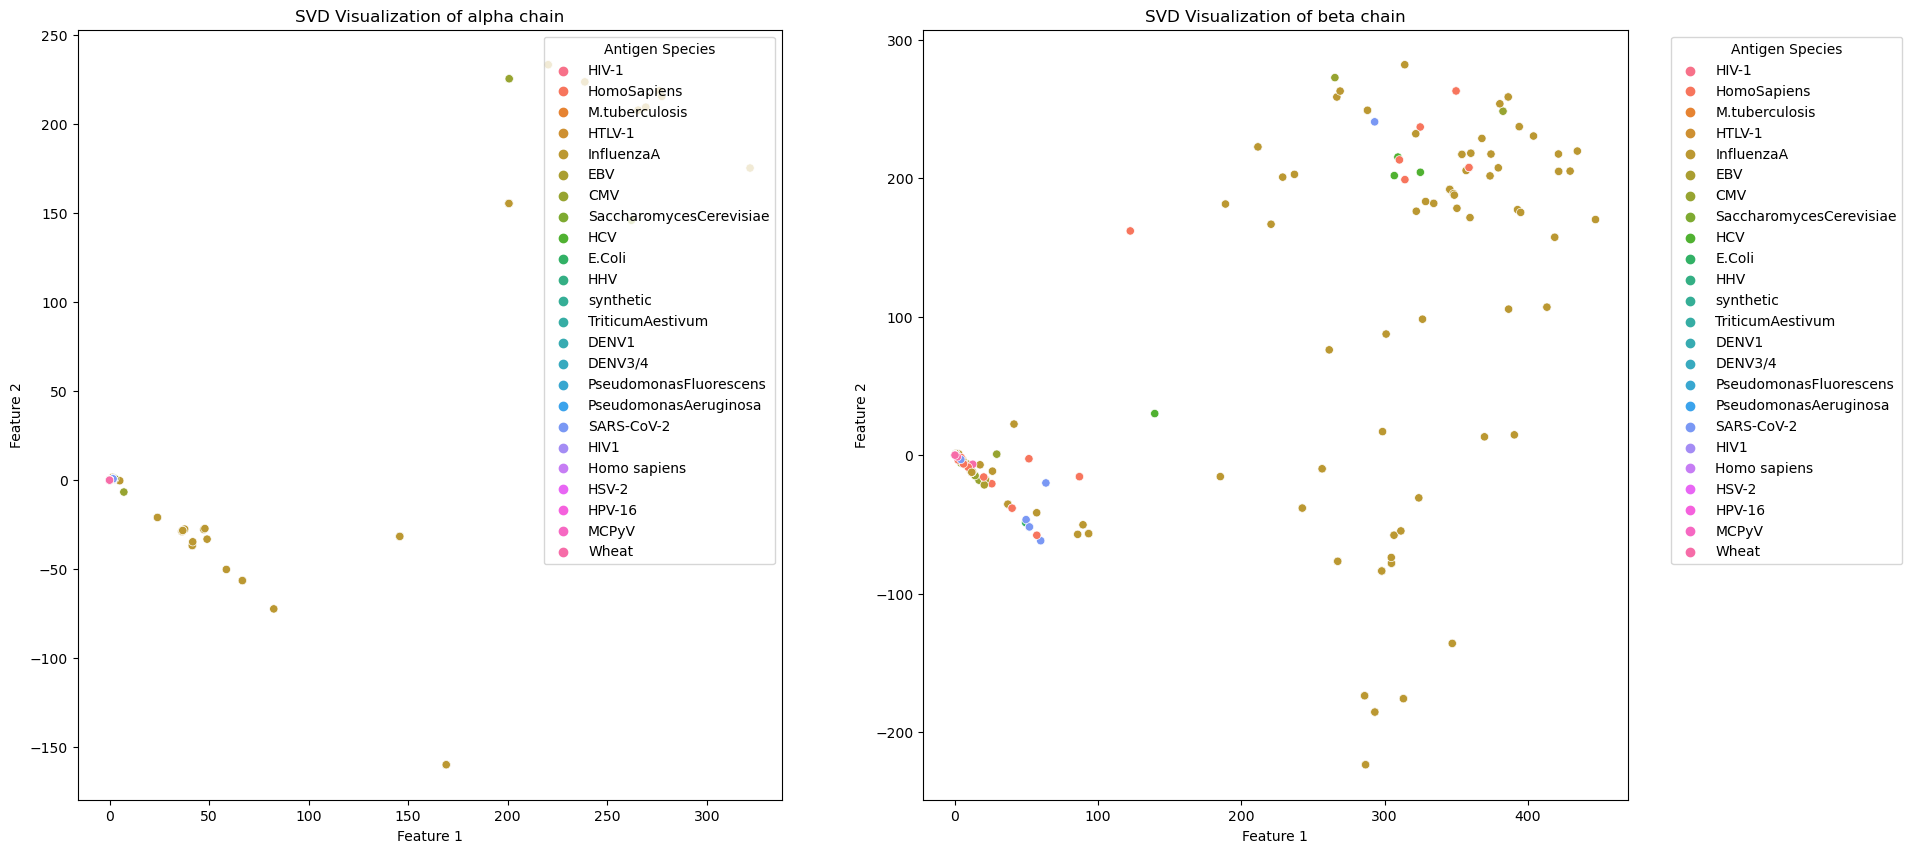

In [53]:
# SVD Visualization for alpha chain and beta chain
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(x=alpha_reduced[:, 0], y=alpha_reduced[:, 1], hue=df_alpha['antigen.species'], ax=ax[0])
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('SVD Visualization of alpha chain')

sns.scatterplot(x=beta_reduced[:, 0], y=beta_reduced[:, 1], hue=df_beta['antigen.species'], ax=ax[1])
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('SVD Visualization of beta chain')

# add legend
ax[0].legend(loc='upper right', bbox_to_anchor=(1,1),title='Antigen Species')
ax[1].legend(loc='upper right', bbox_to_anchor=(1.4,1),title='Antigen Species')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

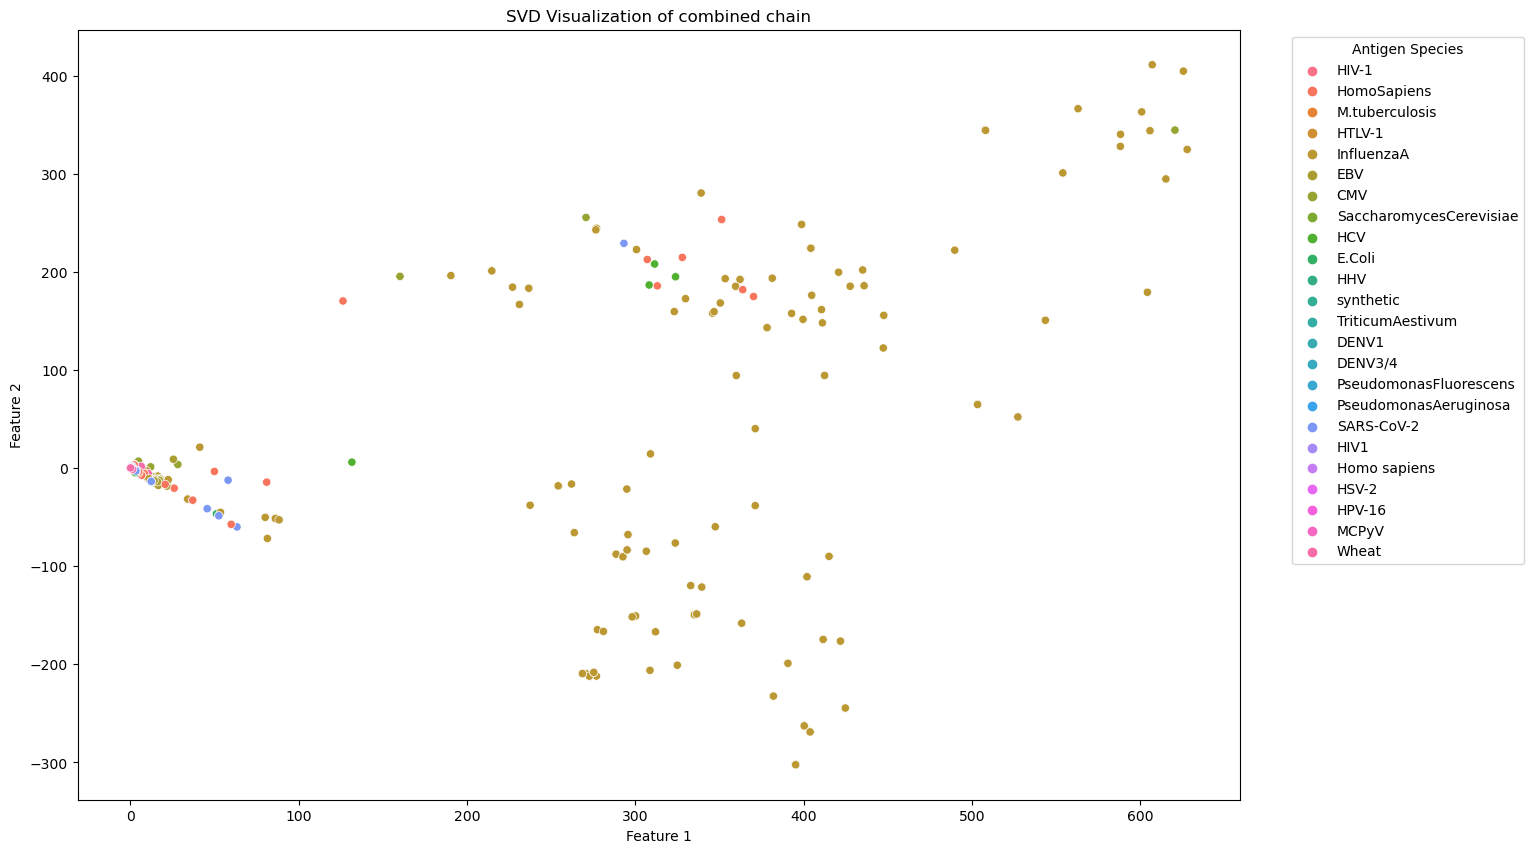

In [54]:
fig, ax0 = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=combined_reduced[:, 0], y=combined_reduced[:, 1], hue=df_merge['antigen.species_x'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('SVD Visualization of combined chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')
plt.show

In [55]:
#since the data is in very high dimension, to boost the speed of process
#frist using TruncatedSVD to lower the dimension to 50
svd = TruncatedSVD(n_components=50)
alpha_reduced = svd.fit_transform(tr_a.rw_alpha)
beta_reduced = svd.fit_transform(tr_b.rw_beta)
combined_reduced = svd.fit_transform(combined_rw_distance)
explained_variance_ratio = svd.explained_variance_ratio_
explained_variance_ratio

array([0.3882395 , 0.13514828, 0.02109443, 0.02030892, 0.01819998,
       0.01599713, 0.01450254, 0.01325514, 0.01314082, 0.01247724,
       0.00935262, 0.00880226, 0.00766873, 0.00635824, 0.00616548,
       0.00586983, 0.00542661, 0.00520777, 0.00510324, 0.00468326,
       0.00441131, 0.00422016, 0.00398754, 0.00389603, 0.00369929,
       0.00354989, 0.00350986, 0.00323799, 0.00315196, 0.0030039 ,
       0.0029181 , 0.00284761, 0.00255034, 0.0025551 , 0.00253137,
       0.00248451, 0.00247176, 0.00245407, 0.00243791, 0.00232388,
       0.00230024, 0.00225143, 0.00210409, 0.0021039 , 0.00209065,
       0.00206329, 0.00203538, 0.00201356, 0.00185621, 0.00182007])

In [56]:
alpha_reduced

array([[-4.91602548e-17,  9.31662008e-17,  1.32788427e-17, ...,
         5.08202339e-19, -5.85684563e-17, -4.07222819e-18],
       [ 5.28574571e-20,  3.19242102e-20,  6.54993836e-18, ...,
        -1.01649875e-17,  5.83361419e-17, -5.14434445e-18],
       [-3.72019332e-19,  6.23666664e-18,  1.06458830e-16, ...,
         1.28039326e-08,  2.48703736e-08, -1.16061608e-08],
       ...,
       [-2.79331365e-40,  2.00333305e-39,  3.64583058e-38, ...,
         8.29572192e-31,  4.80335986e-31, -1.43055681e-30],
       [-5.24990919e-40, -1.01804502e-39, -8.16185416e-38, ...,
         8.16826828e-30,  4.53260488e-30, -2.13157536e-30],
       [ 1.13921720e-11, -3.44749232e-10,  4.23679917e-08, ...,
        -1.81170123e+00,  9.38639317e-01,  1.05319470e+00]])

In [57]:
#using Tsne

tsne = TSNE(n_components=2, random_state=42)
A_tsne = tsne.fit_transform(alpha_reduced)
B_tsne = tsne.fit_transform(beta_reduced)
# using UMAP

umap = UMAP(n_components=2, random_state=42)
A_umap = umap.fit_transform(alpha_reduced)
B_umap = umap.fit_transform(beta_reduced)

D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [58]:
# Instantiated Tsne for combined chain
C_tsne=tsne.fit_transform(combined_reduced)

In [59]:
# Instantiated Umap for combined chain
C_umap=umap.fit_transform(combined_reduced)

D:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [60]:
from sklearn.decomposition import PCA

# 创建PCA对象，设置要降维的目标维度为2
pca = PCA(n_components=2)

# 对稀疏矩阵进行PCA降维
A_pca = pca.fit_transform(alpha_reduced)
B_pca= pca.fit_transform(beta_reduced)

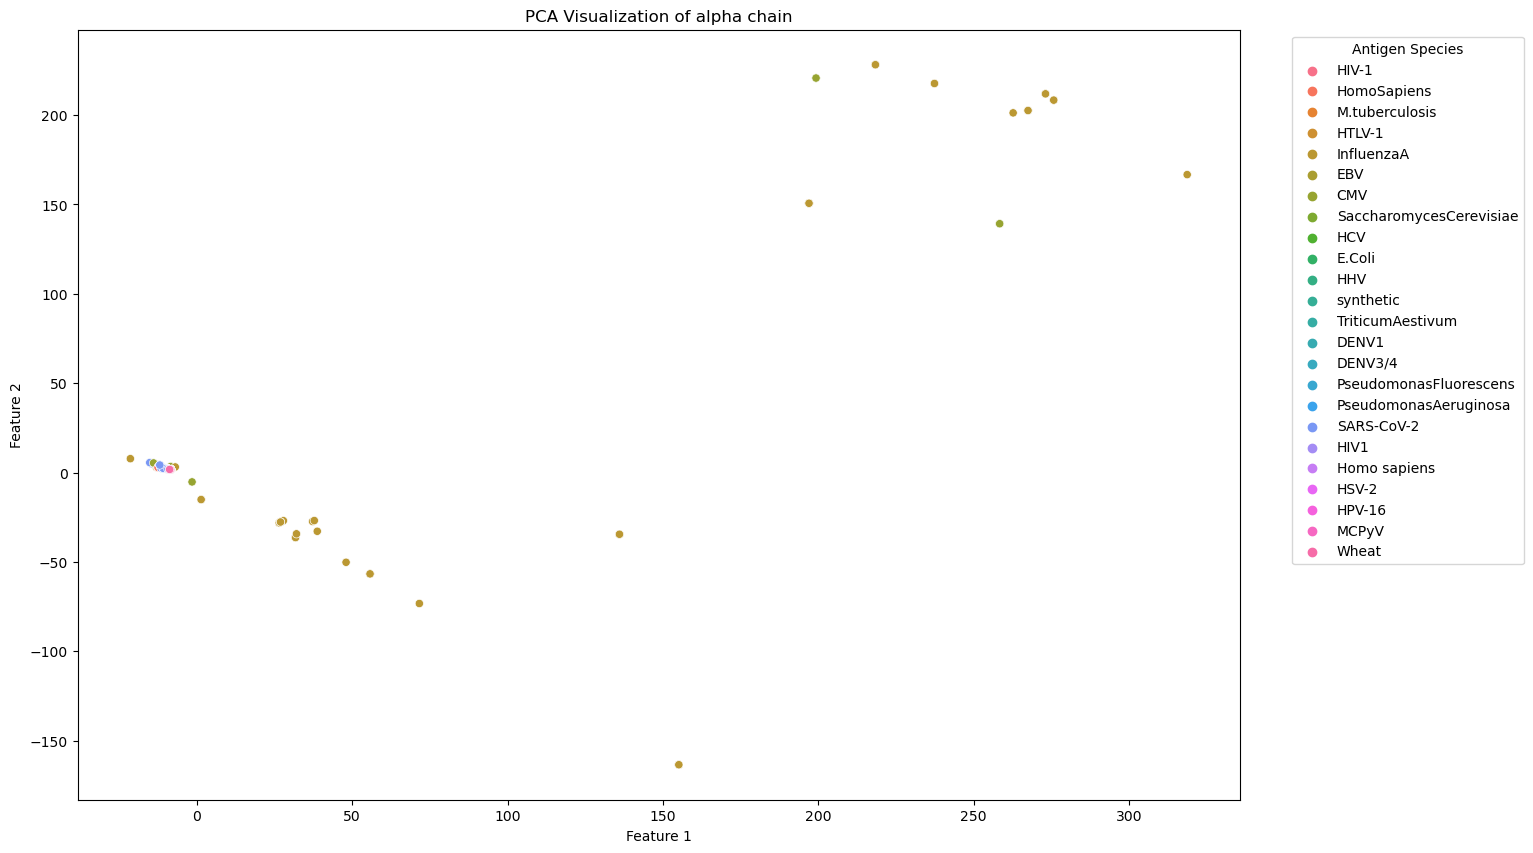

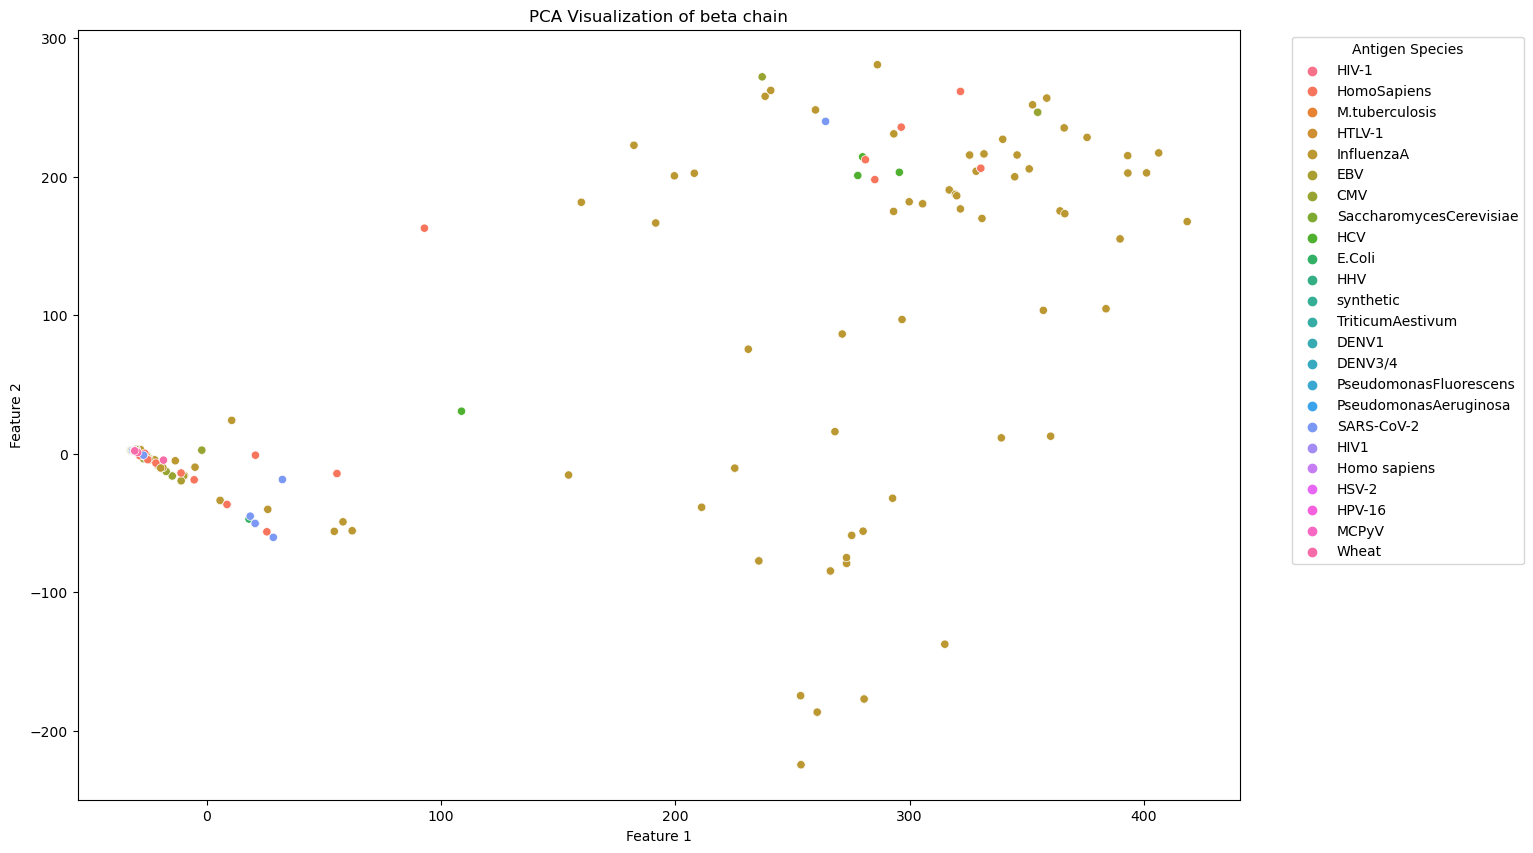

In [61]:
fig1, ax1 = plt.subplots(figsize=(15, 10))

# PCA Visualization of alpha chain
sns.scatterplot(x=A_pca[:, 0], y=A_pca[:, 1],hue=df_alpha['antigen.species'], ax=ax1)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('PCA Visualization of alpha chain')
ax1.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

plt.show()

fig2, ax2 = plt.subplots(figsize=(15, 10))

# PCA Visualization of beta chain
sns.scatterplot(x=B_pca[:, 0], y=B_pca[:, 1], hue=df_beta['antigen.species'], ax=ax2)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('PCA Visualization of beta chain')
ax2.legend(loc='upper right',bbox_to_anchor=(1.25,1), title='Antigen Species')

plt.show()

In [62]:
A_pca.shape


(1890, 2)

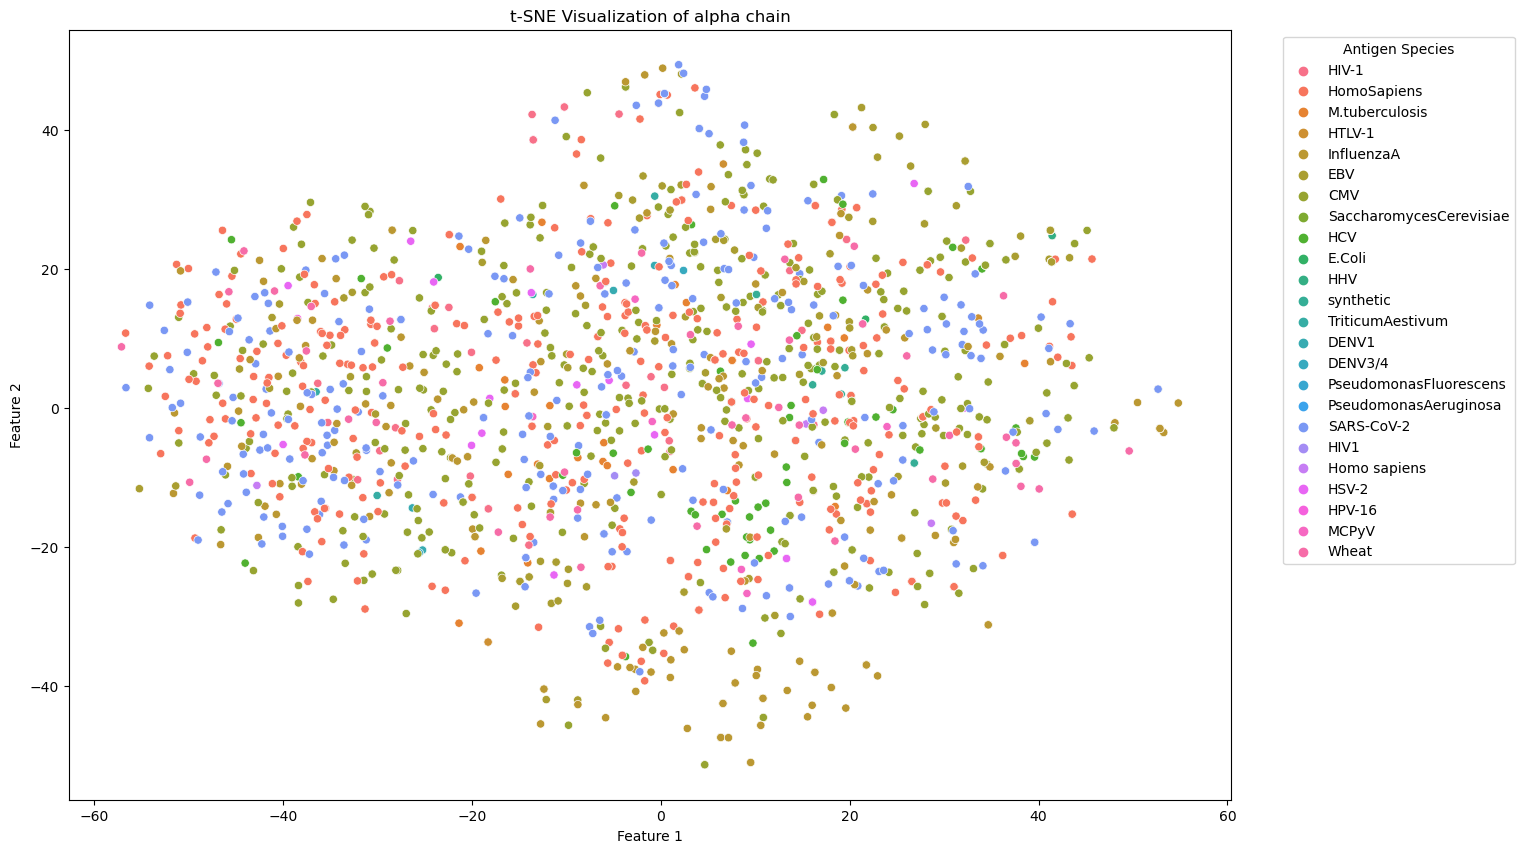

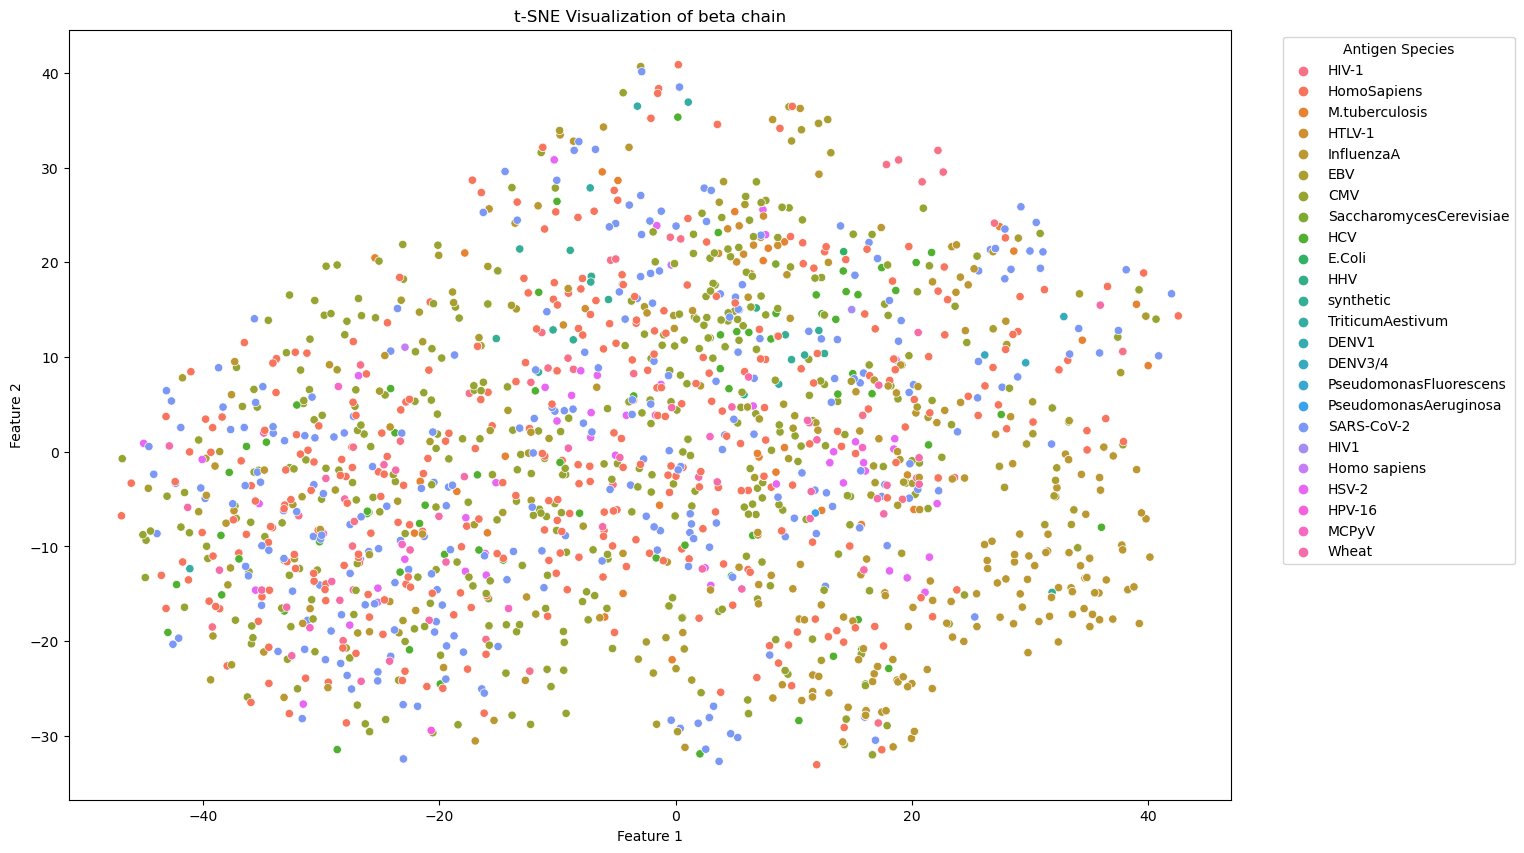

In [63]:
# t-SNE Visualization for alpha chain and beta chain
fig, ax0 = plt.subplots(figsize=(15, 10))

sns.scatterplot(x=A_tsne[:, 0], y=A_tsne[:, 1], hue=df_alpha['antigen.species'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('t-SNE Visualization of alpha chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

fig, ax1 = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=B_tsne[:, 0], y=B_tsne[:, 1], hue=df_beta['antigen.species'], ax=ax1)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('t-SNE Visualization of beta chain')
ax1.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

plt.show()

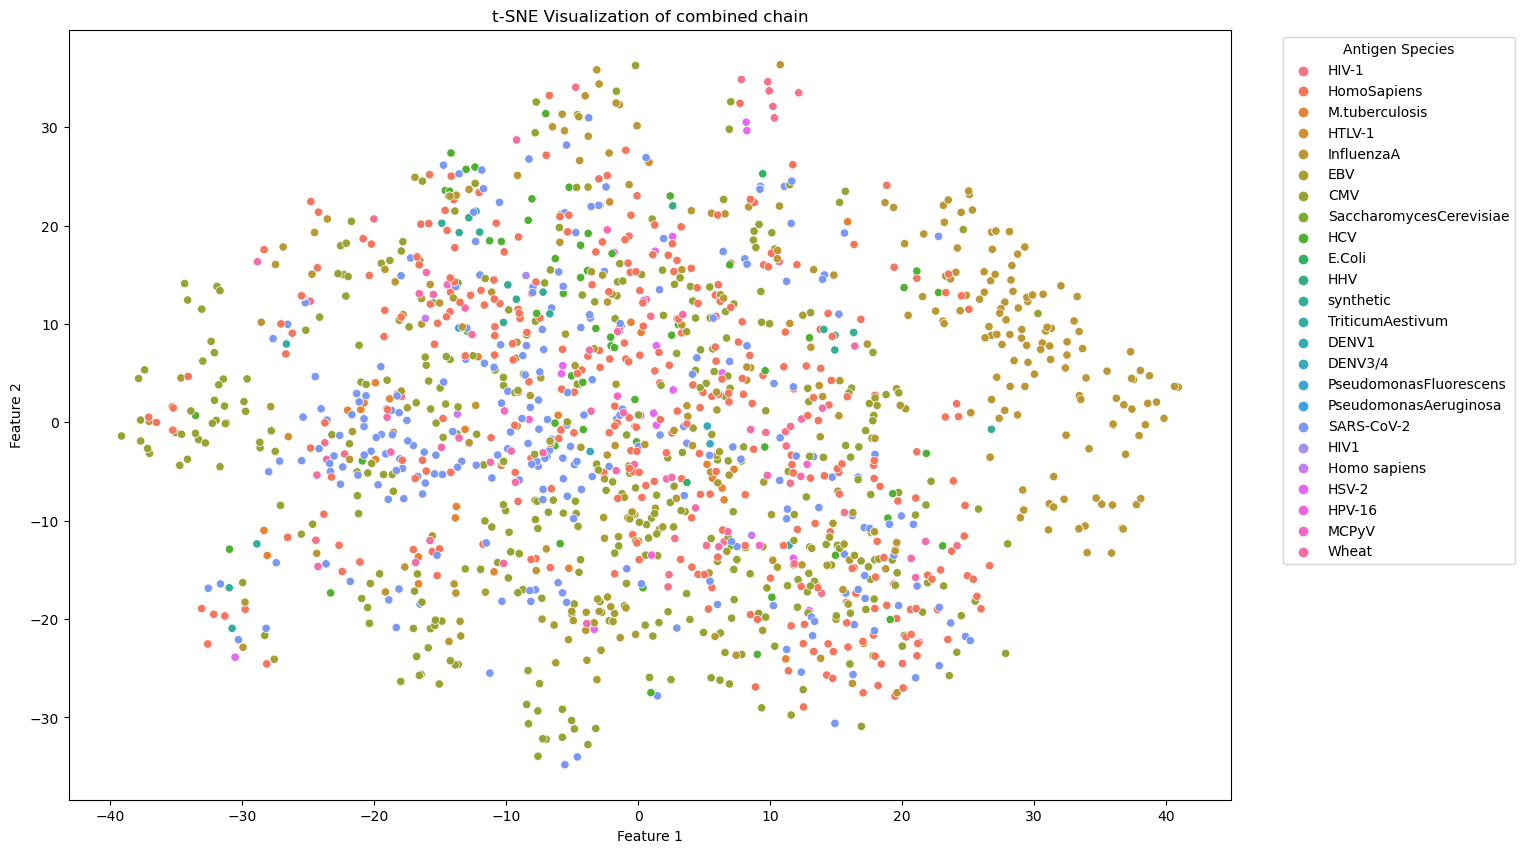

In [67]:
# t-SNE Visualization for combined chain
fig, ax0 = plt.subplots(figsize=(15, 10))

sns.scatterplot(x=C_tsne[:, 0], y=C_tsne[:, 1], hue=df_merge['antigen.species_x'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('t-SNE Visualization of combined chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

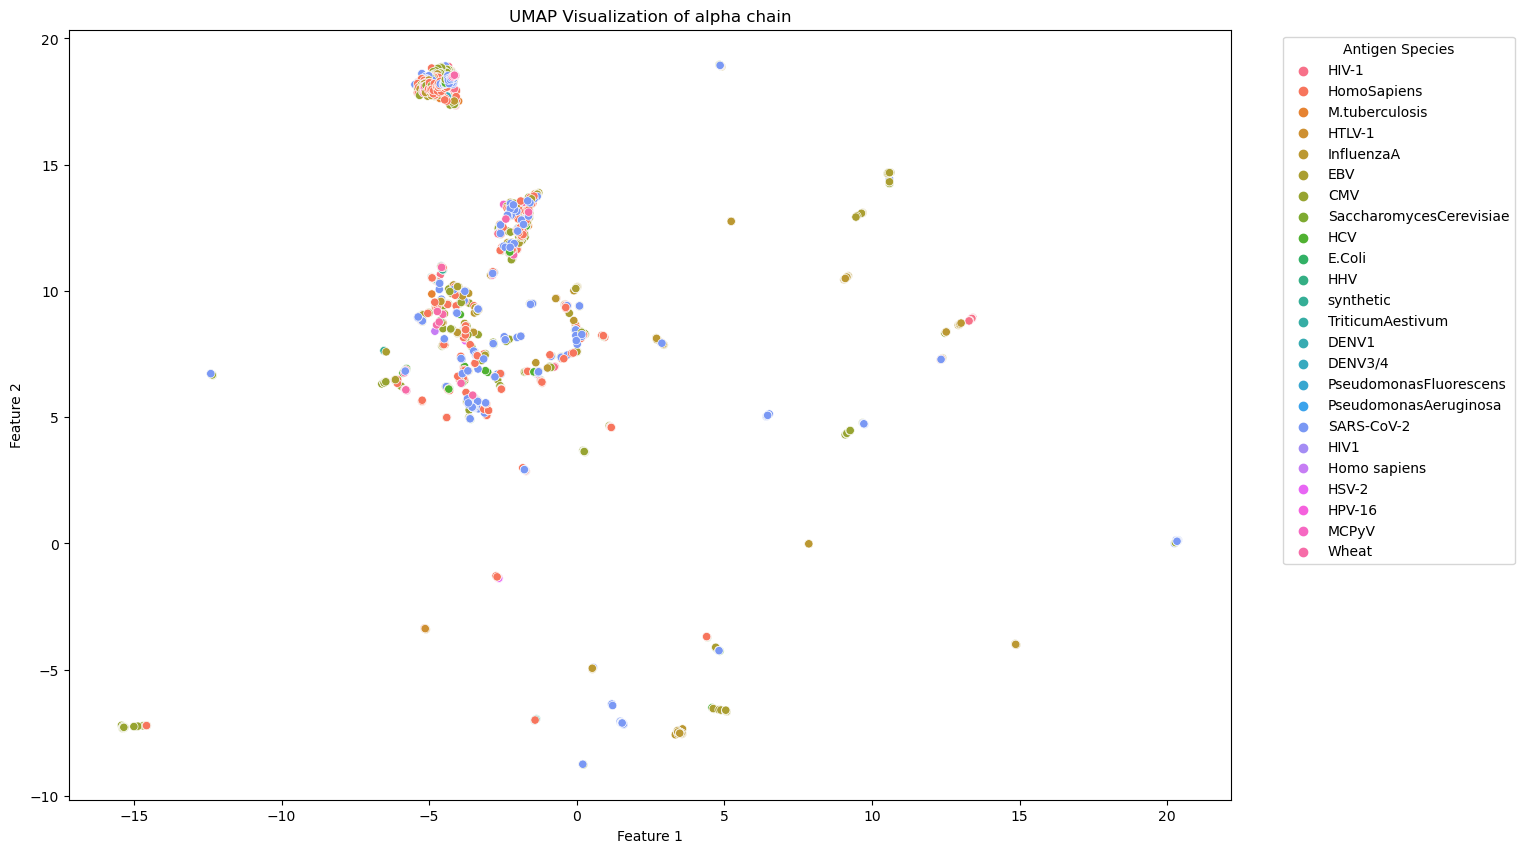

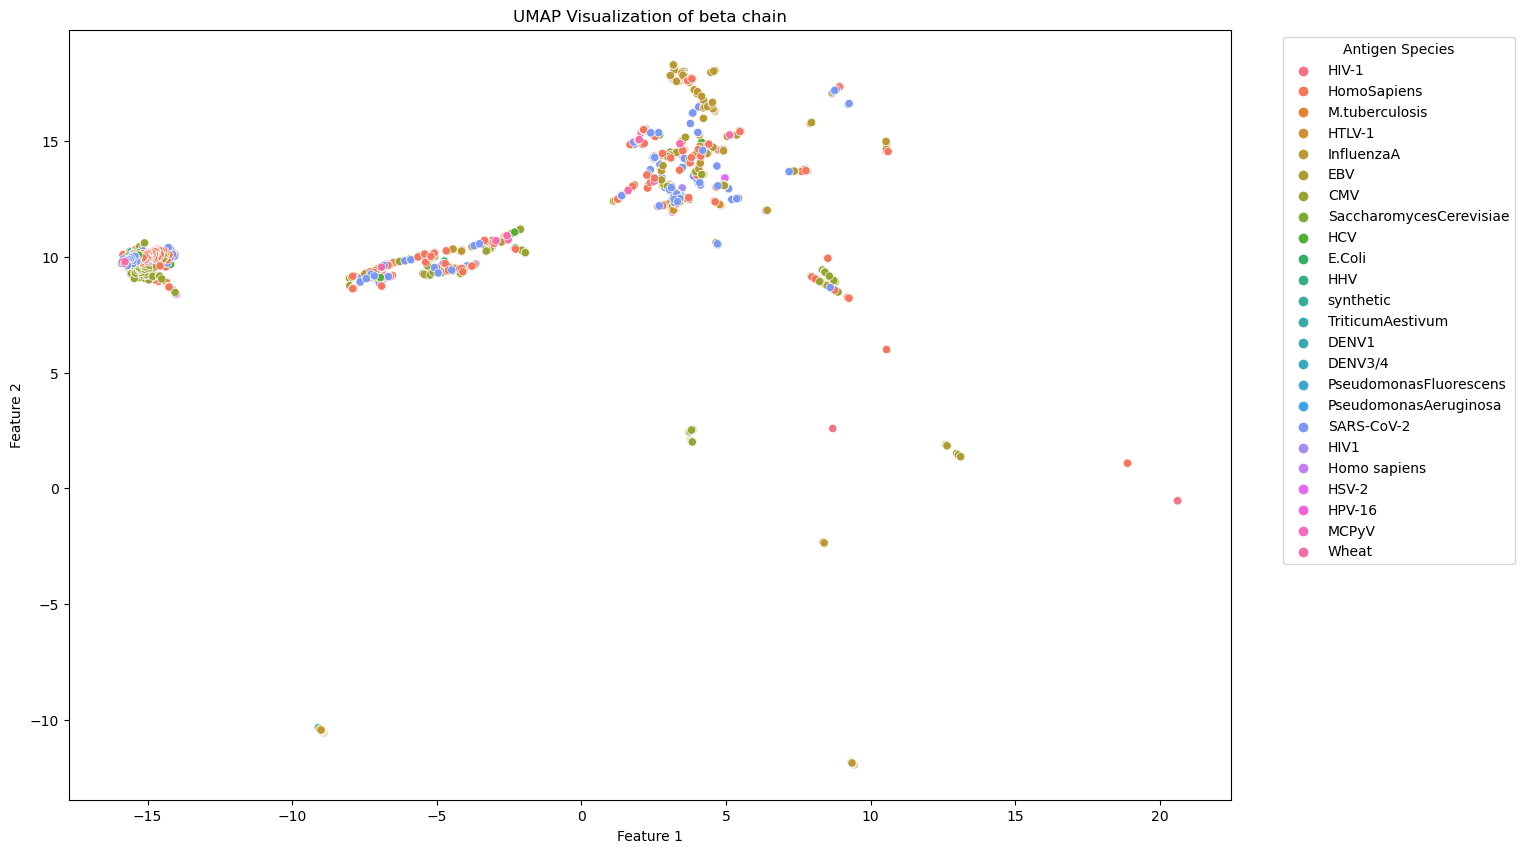

In [65]:
# UMAP Visualization for alpha chain and beta chain
fig, ax0 = plt.subplots(figsize=(15, 10))

sns.scatterplot(x=A_umap[:, 0], y=A_umap[:, 1], hue=df_alpha['antigen.species'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('UMAP Visualization of alpha chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

fig, ax1 = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=B_umap[:, 0], y=B_umap[:, 1], hue=df_beta['antigen.species'], ax=ax1)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('UMAP Visualization of beta chain')
ax1.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

plt.show()

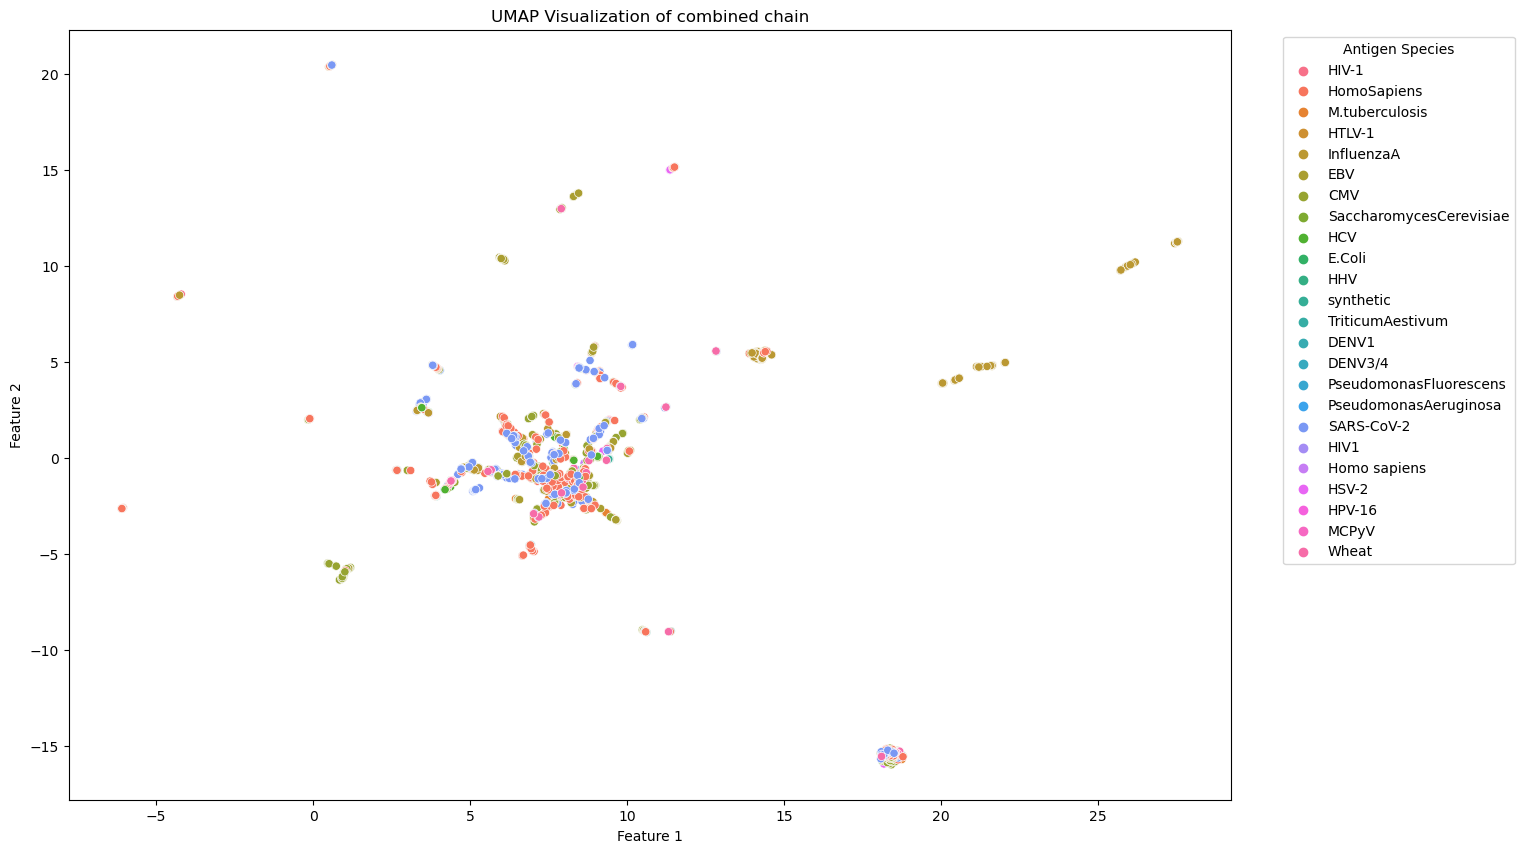

In [66]:
# UMAP Visualization for combined chain
fig, ax0 = plt.subplots(figsize=(15, 10))

sns.scatterplot(x=C_umap[:, 0], y=C_umap[:, 1], hue=df_merge['antigen.species_x'], ax=ax0)
ax0.set_xlabel('Feature 1')
ax0.set_ylabel('Feature 2')
ax0.set_title('UMAP Visualization of combined chain')
ax0.legend(loc='upper right', bbox_to_anchor=(1.25,1),title='Antigen Species')

In [ ]:
# from the comparison of the two pictures,clearly the TSNE method are more likely to shows more defined clusters
# based on our dataset specificity,so we choose TSNE to cluster seperation clearluy

In [91]:
def reduce_dimension(rw_alpha, rw_beta, combined_rw_distance):
    svd = TruncatedSVD(n_components=50) # use svd to reduce dimension to 50 can shorten the process time
    alpha_reduced = svd.fit_transform(rw_alpha)
    beta_reduced = svd.fit_transform(rw_beta)
    combined_reduced = svd.fit_transform(combined_rw_distance)
    tsne = TSNE(n_components=2, random_state=42) # use tsne to reduce dimension continuely can make the result more accurate
    A_tsne = tsne.fit_transform(alpha_reduced)
    B_tsne = tsne.fit_transform(beta_reduced)
    C_tsne = tsne.fit_transform(combined_reduced)
    return A_tsne,B_tsne,C_tsne

In [95]:
homo_alpha,homo_beta,homo_combined = reduce_dimension(homo_alpha_matrix,homo_beta_matrix,homo_combined_matrix)
mouse_alpha,mouse_beta,mouse_combined = reduce_dimension(mouse_alpha_matrix,mouse_beta_matrix,mouse_combined_matrix)
homo_list =[[homo_alpha,df_homo_alpha],[homo_beta,df_homo_beta],[homo_combined,df_homo_combined]]
mouse_list =[[mouse_alpha,df_mouse_alpha],[mouse_beta,df_mouse_beta],[mouse_combined,df_mouse_combined]]

In [119]:
def plot_graph(data_list):
    for matrix, df in data_list:
        # Create a new figure and axis
        fig, ax = plt.subplots()
        # Plot t-SNE visualization
        sns.scatterplot(x=matrix[:, 0], y=matrix[:, 1], hue=df['antigen.species'], ax=ax)

        # Set labels and title
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_title('Visualization of',data)

        # Set legend
        ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title=legend_title)

        # Show the plot
        plt.show()

In [120]:
plot_graph(homo_list)
plot_graph(mouse_list)

ValueError: too many values to unpack (expected 2)